Installing required packages

In [ ]:
# Basemap toolkit is useed for the geographical plot
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip


Importing required packages

In [ ]:
import numpy as np 
import pandas as pd 

# Packages for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
%matplotlib inline

In [ ]:
# Setting table to include filter parameters
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# #disable setting table to include filter parameters
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

In [ ]:
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = '/content/drive/Shareddrives/CIS545_Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA WRANGLING

In [ ]:
#root_path+'input/database.csv'
data = pd.read_csv("https://www.dropbox.com/s/r1f53o4d4xtjudp/SHR76_20.csv?dl=1", na_values=['NA'], dtype='unicode')
data.head(5)

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197609001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,No,1976,NaN,September,1,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30,Male,Black,Unknown or not reported,999,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,NaN,0,0,030180,"Montgomery, AL"
1,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Female,Black,Unknown or not reported,62,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,NaN,0,0,030180,"Montgomery, AL"
2,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48,Male,White,Unknown or not reported,52,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,NaN,0,1,030180,"Montgomery, AL"
3,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,NaN,March,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,NaN,0,0,030180,"Montgomery, AL"
4,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,August,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17,Female,Black,Unknown or not reported,21,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,NaN,0,0,030180,"Montgomery, AL"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827219 entries, 0 to 827218
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            827219 non-null  object
 1   CNTYFIPS      827219 non-null  object
 2   Ori           827219 non-null  object
 3   State         827219 non-null  object
 4   Agency        827219 non-null  object
 5   Agentype      827219 non-null  object
 6   Source        827219 non-null  object
 7   Solved        827219 non-null  object
 8   Year          827219 non-null  object
 9   StateName     22468 non-null   object
 10  Month         827219 non-null  object
 11  Incident      827219 non-null  object
 12  ActionType    827219 non-null  object
 13  Homicide      827219 non-null  object
 14  Situation     827219 non-null  object
 15  VicAge        827219 non-null  object
 16  VicSex        827219 non-null  object
 17  VicRace       827219 non-null  object
 18  VicEthnic     827219 non

In [ ]:
data['VicAge'] = pd.to_numeric(data['VicAge'], errors='coerce')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['OffAge'] = pd.to_numeric(data['OffAge'], errors='coerce')
data['VicCount'] = pd.to_numeric(data['VicCount'], errors='coerce')
data['OffCount'] = pd.to_numeric(data['OffCount'], errors='coerce')
data['Incident'] = pd.to_numeric(data['Incident'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827219 entries, 0 to 827218
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            827219 non-null  object
 1   CNTYFIPS      827219 non-null  object
 2   Ori           827219 non-null  object
 3   State         827219 non-null  object
 4   Agency        827219 non-null  object
 5   Agentype      827219 non-null  object
 6   Source        827219 non-null  object
 7   Solved        827219 non-null  object
 8   Year          827219 non-null  int64 
 9   StateName     22468 non-null   object
 10  Month         827219 non-null  object
 11  Incident      827219 non-null  int64 
 12  ActionType    827219 non-null  object
 13  Homicide      827219 non-null  object
 14  Situation     827219 non-null  object
 15  VicAge        827219 non-null  int64 
 16  VicSex        827219 non-null  object
 17  VicRace       827219 non-null  object
 18  VicEthnic     827219 non

##### States Cleaning
Let us check the number of states. The expected value is 51



In [ ]:
len(data['State'].unique())

52

In [ ]:
data['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'PAPSP8', 'Rhodes Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

We see that the states that don't belong are PAPSP8. Let us see whether there are significant data points or they are outliers.

In [ ]:
data[data['State']=='PAPSP8']['Incident'].count()

1

Clearly PAPSP8 is a mistake and we have to drop the row that contains this entry.

In [ ]:
data = data[data['State']!='PAPSP8']

##### Relationship with Unsolved Cases
Check the relation between unsolved cases and a few other parameters.

In [ ]:
data[(data["Solved"]=="No")]['Incident'].count()

243989

In [ ]:
# Are unsolved crimes and 0 values for ages connected 
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Solved"]=="No") & (data["Relationship"]=='Relationship not determined')]['Incident'].count()

226389

In [ ]:
data[(data["Solved"]=="No") & (data["VicEthnic"]=='Unknown or not reported')]['Incident'].count()

143422

In [ ]:
data[(data["Solved"]=="No") & (data["OffEthnic"]=='Unknown or not reported')]['Incident'].count()

243623

In [ ]:
data[(data["Solved"]=="No") & (data["OffCount"]==0)]['Incident'].count() 

236722

In [ ]:
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Solved"]=="No") & (data["OffAge"]==0)]['Incident'].count()

328

##### Visulize the Nans in the data

In [ ]:
# Make a copy as we only wish to show not alter the data
nunality = data.copy()
pd.set_option('mode.chained_assignment', None)
# Subset the unknown data and convert it to nan numpy type
vic_age_limit = nunality["VicAge"] > 99
data["VicAge"][vic_age_limit] = np.nan

perp_age_null = nunality['OffAge'] == 0 
nunality["OffAge"][perp_age_null] = np.nan

vic_sex_null = nunality['VicSex'] == 'Unknown' 
nunality["VicSex"][vic_sex_null] = np.nan

vic_Race_null = nunality['VicRace'] == 'Unknown' 
nunality["VicRace"][vic_Race_null] = np.nan

vic_Ethnicity_null = nunality['VicEthnic'] == 'Unknown or not reported' 
nunality["VicEthnic"][vic_Ethnicity_null] = np.nan

perp_sex_null = nunality['OffSex'] == 'Unknown' 
nunality["OffSex"][perp_sex_null] = np.nan

perp_Race_null = nunality['OffRace'] == 'Unknown' 
nunality["OffRace"][perp_Race_null] = np.nan

perp_Ethnicity_null = nunality['OffEthnic'] == 'Unknown or not reported' 
nunality["OffEthnic"][perp_Ethnicity_null] = np.nan

relationship_null = nunality['Relationship'] == 'Unknown' 
nunality['Relationship'][relationship_null] = np.nan

weapon_null = nunality['Weapon'] == 'Unknown' 
nunality['Weapon'][weapon_null] = np.nan

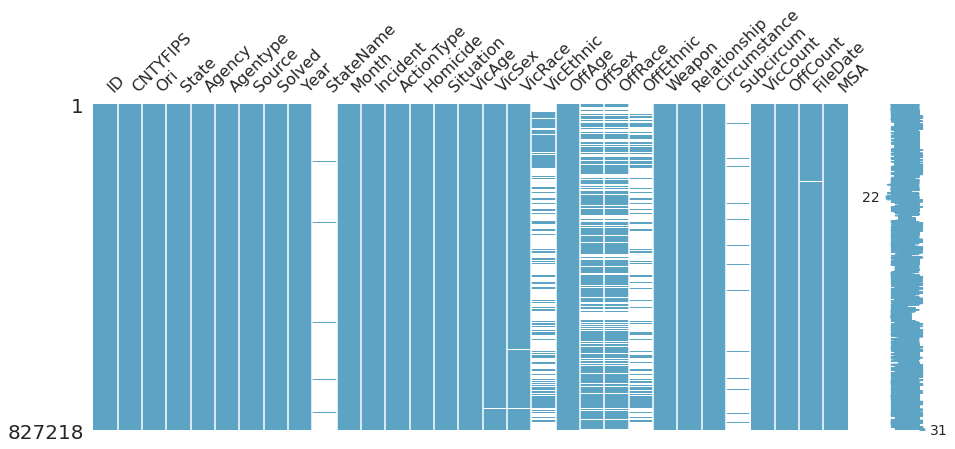

In [ ]:
mno.matrix(nunality, figsize = (15, 6),color=(0.368, 0.647, 0.772))

Display how much data is missing as a percentage

In [ ]:
nunality_check = nunality.isna().sum()
nunality_pct = nunality_check/len(nunality)
nunality_pct_times = nunality_pct * 100
nunality_pct_times[nunality_pct_times != 0]

StateName    97.284029
VicSex        0.169121
VicRace       1.130899
VicEthnic    58.746062
OffAge        0.052465
OffSex       29.532602
OffRace      30.483258
OffEthnic    71.713502
Subcircum    96.077092
FileDate      0.303427
dtype: float64

##### Replacing unknown values

Convert the missing data to NaN. 

In [ ]:
# make a copy of the original data to keep it safe
data = data.copy()

# replace blank strings with zeros
data['OffAge'] = data['OffAge'].replace(" ", 0)

# convert to integers
data['OffAge'] = data['OffAge'].astype(str).astype(float).astype(int)

# See if the spaces are gone and that if strings became integers
data['OffAge'].unique()

array([999,  62,  52,  22,  21,  80,  54,  26,  24,  68,  28,  20,  44,
        17,  29,  55,  23,  58,  45,  35,  36,  50,  31,  34,  32,  39,
        47,  33,  73,  18,  40,  53,  59,  51,  19,  27,  30,  38,  25,
        61,  70,  16,  42,  41,  48,  46,  37,  60,  71,  66,  43,  67,
        64,  57,  89,  14,  74,  75,  15,  78,  56,  81,  69,  63,  13,
        49,  83,  82,  79,  76,  77,  65,  72,  84,  12,  86,  93,  11,
        91,  10,  85,  90,   9,  92,  99,   1,   8,  87,   7,   2,   5,
         6,   4,  88,  94,   3,  96,  95,  97,   0,  98])

Remove the data for the perpetrator age is greater than 150 years and if victim age is greater than 150 years. The youngest homicide perpetrator was 6 years old so replace them by NaN.

In [ ]:
# subset the age 998
vic_age_limit = data["VicAge"] > 150

# replace them with nan values for that column
data["VicAge"][vic_age_limit] = np.nan

# subset the age 998
off_age_limit = data["OffAge"] > 150

# replace them with nan values for that column
data["OffAge"][off_age_limit] = np.nan

In [ ]:
# replacing perpetrators under the age 6 with NAN

# search for ages below 6
# This returns True/False
under_6 = data["OffAge"] < 6

# replace them with nan values for that column
data["OffAge"][under_6] = np.nan

##### Convert Object to Category dtype
It is faster to filter through categorical data

In [ ]:
# Shorthand explanation: x /= 3, equivalent to x = x / 3
# select only the object data types
# use the apply function to convert them to a category type
data.loc[:, data.dtypes == 'object'] =\
    data.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827218 entries, 0 to 827218
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   State         827218 non-null  category
 1   Source        827218 non-null  category
 2   Solved        827218 non-null  category
 3   Year          827218 non-null  int64   
 4   StateName     22467 non-null   category
 5   Month         827218 non-null  category
 6   Incident      827218 non-null  int64   
 7   ActionType    827218 non-null  category
 8   Homicide      827218 non-null  category
 9   Situation     827218 non-null  category
 10  VicAge        814742 non-null  float64 
 11  VicSex        827218 non-null  category
 12  VicRace       827218 non-null  category
 13  VicEthnic     827218 non-null  category
 14  OffAge        551720 non-null  float64 
 15  OffSex        827218 non-null  category
 16  OffRace       827218 non-null  category
 17  OffEthnic     827218 non-null

In [ ]:
print(data['VicAge'].unique())

[30. 65. 48. 27. 17. 62. 54. nan 51. 24. 44. 67. 38. 28. 16. 56. 33. 70.
 25. 22. 43. 55. 34. 36. 29. 53. 31. 41. 46. 23. 19. 80. 83. 50. 90. 69.
 39. 11. 20. 47. 32. 21. 18. 64. 72. 45. 59. 40. 63. 52. 66. 26.  1.  2.
 49. 35. 42. 76. 60. 73. 15.  3. 75. 57. 77. 12. 10.  5. 68. 79. 61. 78.
 82. 71. 37. 74. 58. 96. 81. 14. 88. 84. 13.  0. 85. 89.  4. 87.  7.  8.
 86.  6.  9. 91. 92. 94. 99. 95. 98. 93. 97.]


#TODO

In [ ]:
# from sklearn.impute import KNNImputer
# from sklearn_pandas import CategoricalImputer

# imputer = KNNImputer(n_neighbors=5)
# data = imputer.fit_transform(data)


Plotting a pairwise plot for all features to view large amount of information all at once

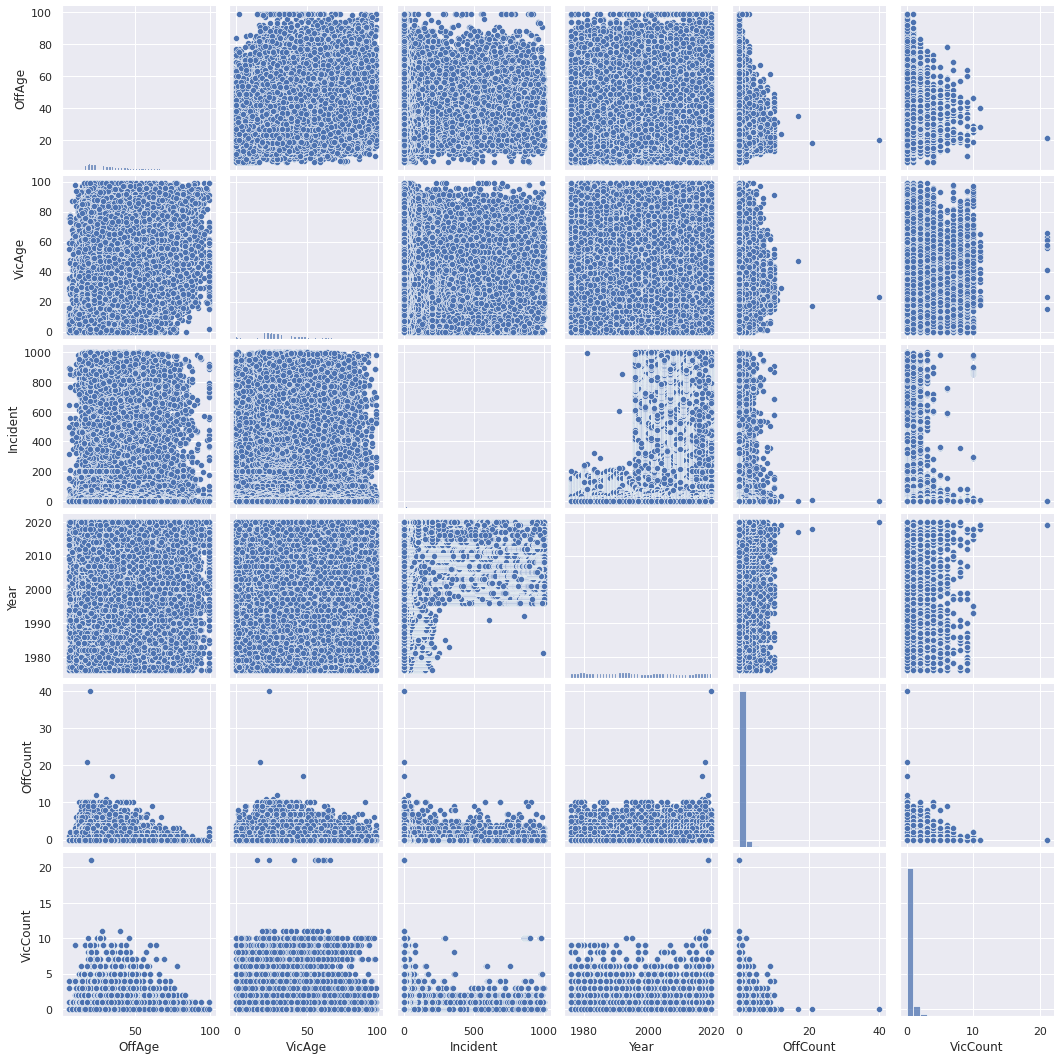

In [ ]:
# set space for seaborn subplots
sns.set()
# Select the columns that have the numerical data 

cols = ['OffAge', 'VicAge', 'Incident', 'Year','OffCount', 'VicCount']

# Create a pairplot for the selected columns from the clean dataset 
# adjust the hight of the plots
sns.pairplot(data[cols], height = 2.5,palette="rocket")

# show the plot
plt.show()

In [ ]:
data = data.drop(columns=['ID', 'CNTYFIPS', 'Ori', 'Agency', 'Agentype', 'Ori','Subcircum','FileDate','MSA','Circumstance'])

Offender age data being skewed to the right shows that many perpetrators are young.

# Exploratory Data Visualization

In this section we want to get a better understanding of the data.

Let us visualize the distribution of crimes based on the months when they occured.
#TODO 
make it a line plot

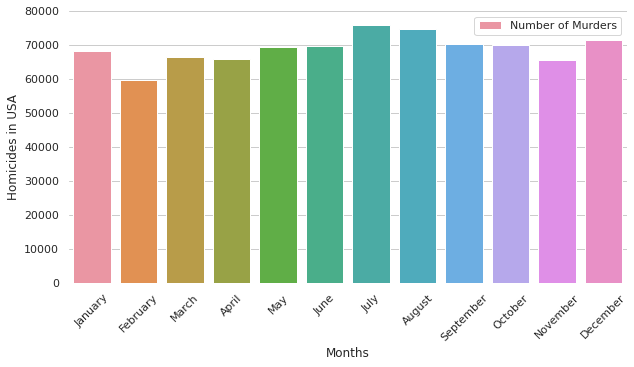

In [ ]:
#read database
# years = pd.DataFrame(data, columns = ['Year']) 
# count_years = years.stack().value_counts()
# homicides = count_years.sort_index(axis=0, ascending=False)
# #plot the total of homicides
# homicides.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Homicides in EEUU between 1980 and 2014');

homicides = data.groupby('Month').agg(count = ('Incident','count')).reset_index()
homicides = homicides.sort_values(by = 'Month')
homicides["Month"] = pd.to_datetime(homicides.Month, format='%B', errors='coerce').dt.month
homicides = homicides.sort_values(by="Month")
homicides['Month'] = pd.to_datetime(homicides['Month'], format='%m').dt.month_name()
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

sns.barplot(y='count', x="Month", data=homicides, label="Number of Murders") #palette= sns.color_palette('pastel'))#colorblind

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(0, 80000), xlabel="Months", ylabel="Homicides in USA")
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)


Based on the histogram we can see that the most homisides take place in the summer while it is warmer. [Source](https://www.nytimes.com/2009/06/19/nyregion/19murder.html?mtrref=www.google.com&gwh=B94888DCB6D671995B1212D1ADB75007&gwt=pay&assetType=REGIWALL)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


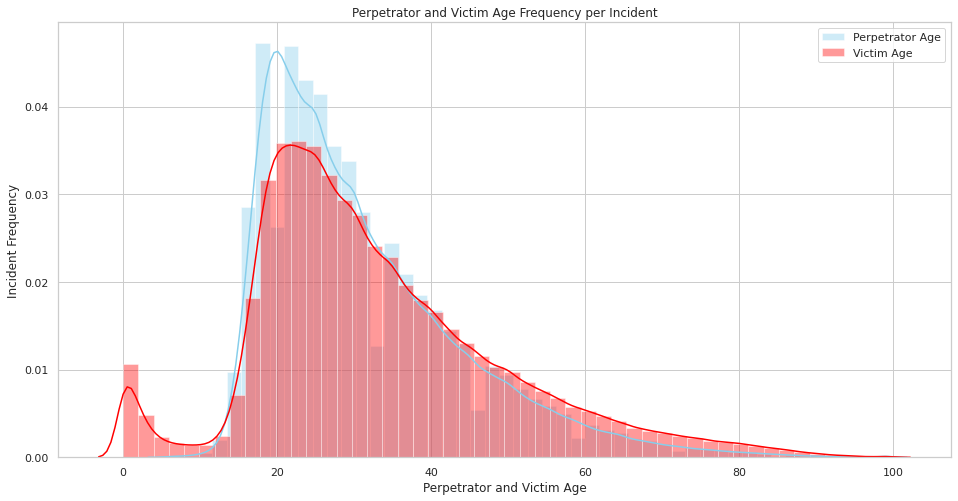

In [ ]:
# select the data series to plot, color, and label
# to create 2 plots in one plane simply create 2 displots 
# labels, title and legend are then added using plt (matplotlib)
plt.subplots(figsize=(16, 8))
sns.distplot( data["OffAge"] , color="skyblue", label="Perpetrator Age")
sns.distplot( data["VicAge"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

Most of the offenders are 18 - 35 years old. The data is skewed to the left. Based on [this report](https://www.cdc.gov/mmwr/volumes/68/wr/mm6803a1.htm) a few reasons for this might be:
*   The accesibility and availability of information on the internet.
*   Rising divorce rates.
*   Domestic violence.

We see a small spike in the homicides of infants. Based on [this report](https://www.childtrends.org/wp-content/uploads/2016/03/indicator_1457608611.364.html) some of the reasons might be:
*   Circumstances surrounding the birth.
*   Maternal risk factors including poverty and unplanned pregnancy.
*   A number of homicides among very young infants go unreported.

In [ ]:
print('The average age of the victims is:', data['VicAge'].median())
print('The most common victim age is:', data['VicAge'].mode()[0])

#I don't want to drop the rows with Perp age 0 because these might be just unknown 
#and could be insightful in terms of the other columns.
#So I keep them but disregard them for this by only going for age>0 (if I don't, they are so numerous that I get mode=0) 
print('On the other hand, the most occurring perpetrator age is:', data[data['OffAge']>0]['OffAge'].mode()[0])

The average age of the victims is: 30.0
The most common victim age is: 22.0
On the other hand, the most occurring perpetrator age is: 20.0


Victims are usually older than offenders. The **most frequent** victim age is 22 compared 20 for perpetrators, and 75% of the data is for the ages 46 and younger.

Text(0.5, 25.96, 'Race and Sex')

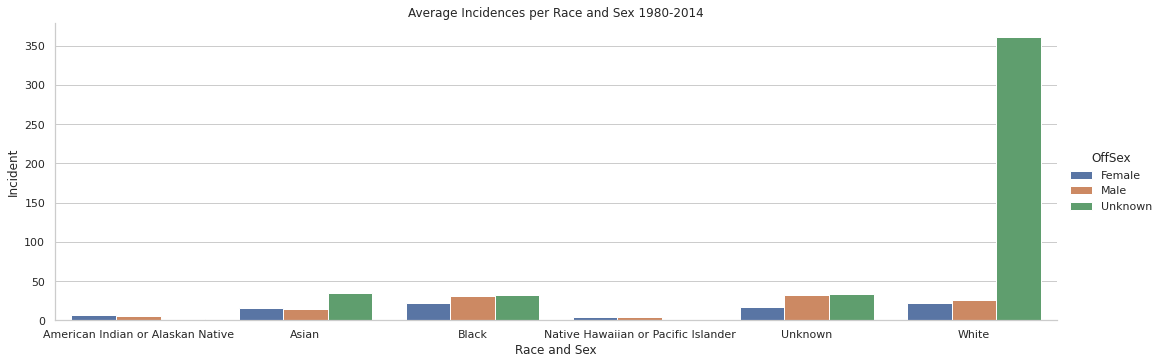

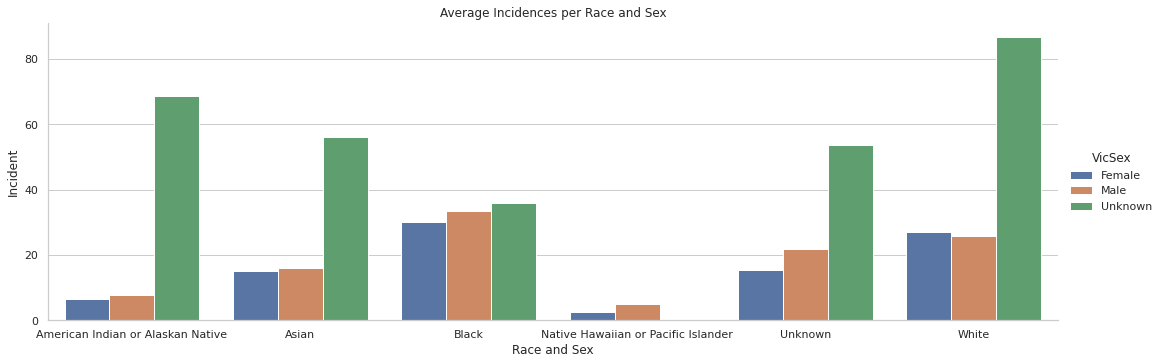

In [ ]:
sns.catplot(x='OffRace',y='Incident',hue='OffSex',data=data, kind='bar',aspect=3,ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014')
plt.xlabel('Race and Sex')
sns.catplot(x='VicRace',y='Incident',hue='VicSex',data=data, kind='bar',aspect=3,ci=None)
plt.title('Average Incidences per Race and Sex')
plt.xlabel('Race and Sex')

Caucasians have the most unknown values. The race distribution might have because of the race and age of the unsolved crimes are not known. From all the races, Asian/Pacific Islanders are the only ones who have more female than male offenders.

In [ ]:
# apply the correlation calculation to the data
correlation = data.corr()
correlation

,Year,Incident,VicAge,OffAge,VicCount,OffCount
Year,1.000000,0.127741,-0.001332,0.033212,0.035488,0.064386
Incident,0.127741,1.000000,0.005187,0.008838,-0.000331,-0.012137
VicAge,-0.001332,0.005187,1.000000,0.383650,-0.023856,-0.033872
OffAge,0.033212,0.008838,0.383650,1.000000,0.008245,-0.174796
VicCount,0.035488,-0.000331,-0.023856,0.008245,1.000000,0.057036
OffCount,0.064386,-0.012137,-0.033872,-0.174796,0.057036,1.000000


We look at whether the numeric data is correlated. We see not strongly correlated. The most correlated features (26.28%) between victim age and offender age.

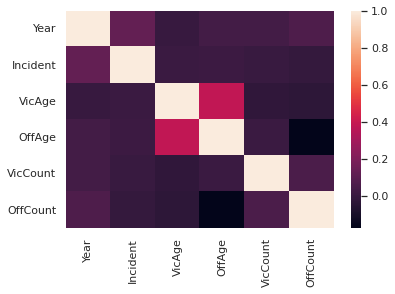

In [ ]:
sns.heatmap(correlation)

In [ ]:
# year = data['Year']
# count_years = year.value_counts()
# years = count_years.sort_index(axis=0, ascending=False)
# print(years.plot(kind='line', fontsize=10, color=(0.2, 0.4, 0.6, 0.6),
#   figsize=(10, 10), title='Number of murders in the USA every year between 1976 and 2020'))

Lets see proportion of solved vs unsolved murders to see if the data is disproportional. 

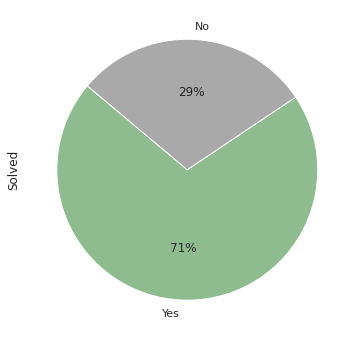

In [ ]:
data['Solved'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(6,6),  colors = ['darkseagreen', 'darkgray'], startangle=140)

Based on the figure, the data is not very dispropotional and we do not need under or over sampling.

Let us look at the weapons used.

In [ ]:
print('The list of weapons used in these murders:')
print(data['Weapon'].value_counts())
print('As we can see, the most popular weapon is the',data['Weapon'].value_counts().index[0].lower())

The list of weapons used in these murders:
Handgun - pistol, revolver, etc         404196
Knife or cutting instrument             119912
Firearm, type not stated                 74381
Personal weapons, includes beating       47142
Other or type unknown                    43412
Shotgun                                  39330
Blunt object - hammer, club, etc         36116
Rifle                                    30701
Strangulation - hanging                  10100
Fire                                      7890
Asphyxiation - includes death by gas      5041
Other gun                                 3218
Narcotics or drugs, sleeping pills        2791
Drowning                                  1511
Explosives                                 630
Poison - does not include gas              586
Pushed or thrown out window                261
Name: Weapon, dtype: int64
As we can see, the most popular weapon is the handgun - pistol, revolver, etc


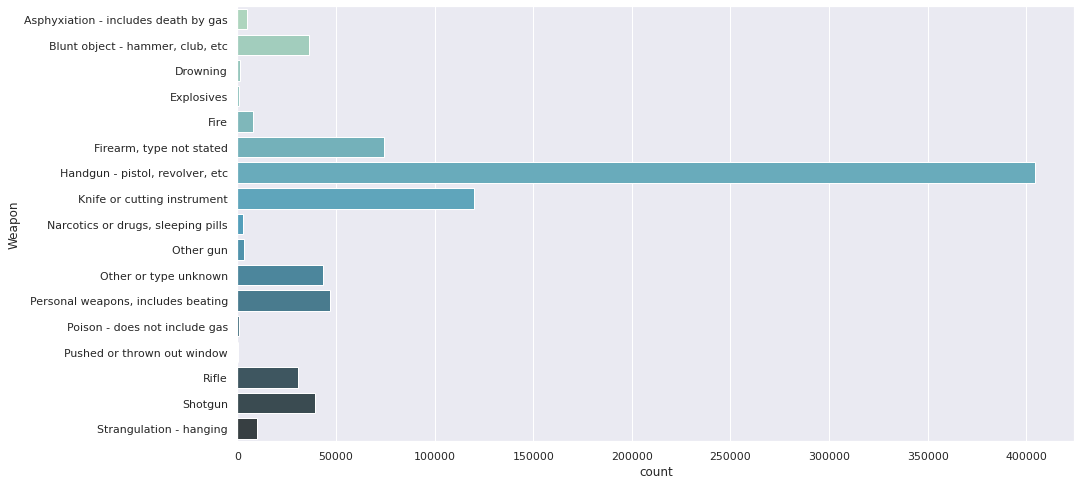

In [ ]:
sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(y="Weapon",data=data, palette="GnBu_d")

In [ ]:
data.Weapon.unique().to_list()

['Other or type unknown',
 'Handgun - pistol, revolver, etc',
 'Shotgun',
 'Knife or cutting instrument',
 'Blunt object - hammer, club, etc',
 'Rifle',
 'Personal weapons, includes beating',
 'Firearm, type not stated',
 'Drowning',
 'Narcotics or drugs, sleeping pills',
 'Strangulation - hanging',
 'Fire',
 'Asphyxiation - includes death by gas',
 'Explosives',
 'Poison - does not include gas',
 'Pushed or thrown out window',
 'Other gun']

Some of these weapons fall into the same firearm category: 'Handgun - pistol, revolver, etc', handguns, 'Shotgun', 'Rifle', 'Firearm, 'Other gun'. Hence we will combine them into one 'firearm' category.

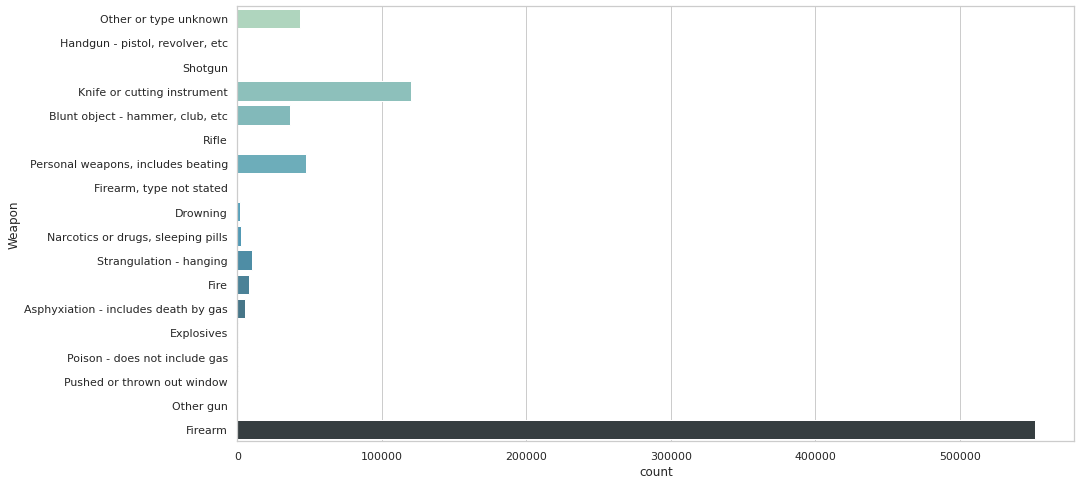

In [ ]:
categories = np.array(['Other or type unknown',
 'Handgun - pistol, revolver, etc',
 'Shotgun',
 'Knife or cutting instrument',
 'Blunt object - hammer, club, etc',
 'Rifle',
 'Personal weapons, includes beating',
 'Firearm, type not stated',
 'Drowning',
 'Narcotics or drugs, sleeping pills',
 'Strangulation - hanging',
 'Fire',
 'Asphyxiation - includes death by gas',
 'Explosives',
 'Poison - does not include gas',
 'Pushed or thrown out window',
 'Other gun',
 'Firearm'])
murder_guns_combined = data
murder_guns_combined['Weapon'] = pd.Categorical(murder_guns_combined['Weapon'], categories=categories, ordered=True)
murder_guns_combined.loc[murder_guns_combined['Weapon']=='Handgun - pistol, revolver, etc', 'Weapon'] = 'Firearm'
murder_guns_combined.loc[murder_guns_combined['Weapon']=='Rifle', 'Weapon'] = 'Firearm'
murder_guns_combined.loc[murder_guns_combined['Weapon']=='Shotgun', 'Weapon'] = 'Firearm'
murder_guns_combined.loc[murder_guns_combined['Weapon']=='Firearm, type not stated', 'Weapon'] = 'Firearm'
murder_guns_combined.loc[murder_guns_combined['Weapon']=='Other gun', 'Weapon'] = 'Firearm'

sns.countplot(y="Weapon",data=murder_guns_combined, palette="GnBu_d");

Now we look at the relationship with the victim age

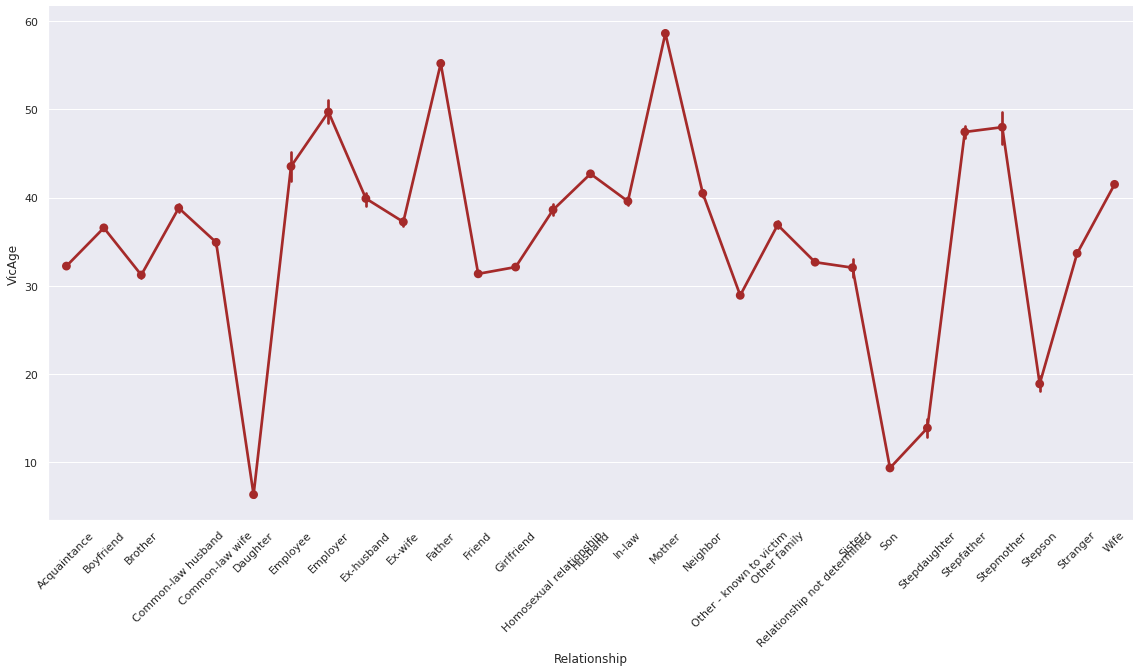

In [ ]:
g = sns.catplot(x='Relationship', y='VicAge', data=data, kind="point", color='brown', height=8, aspect=2)
g.set_xticklabels(rotation=45)

# TO FIX

In [ ]:
# plt.figure(figsize=(12,15),facecolor='#efefef')
# known = data[data['OffSex'] != 'Unknown']
# known = known[known['Relationship'] != 'Relationship not determined']
# known = known[known['Relationship'] != 'Boyfriend']
# known = known[known['Relationship'] != 'Girlfriend']
# ax = sns.heatmap(pd.crosstab(known['Relationship'], known['OffSex']).apply(lambda r: r/r.sum(), axis=1), annot=True, fmt=".0%", linewidths=.5,cmap='Reds')
# ax.set_title('How the victim is related to the perp based on the perpetrator\'s sex')
# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0, .25, .50, .75, 1])
# cbar.set_ticklabels(['0%', '25%', '50%',  '75%', '100%'])


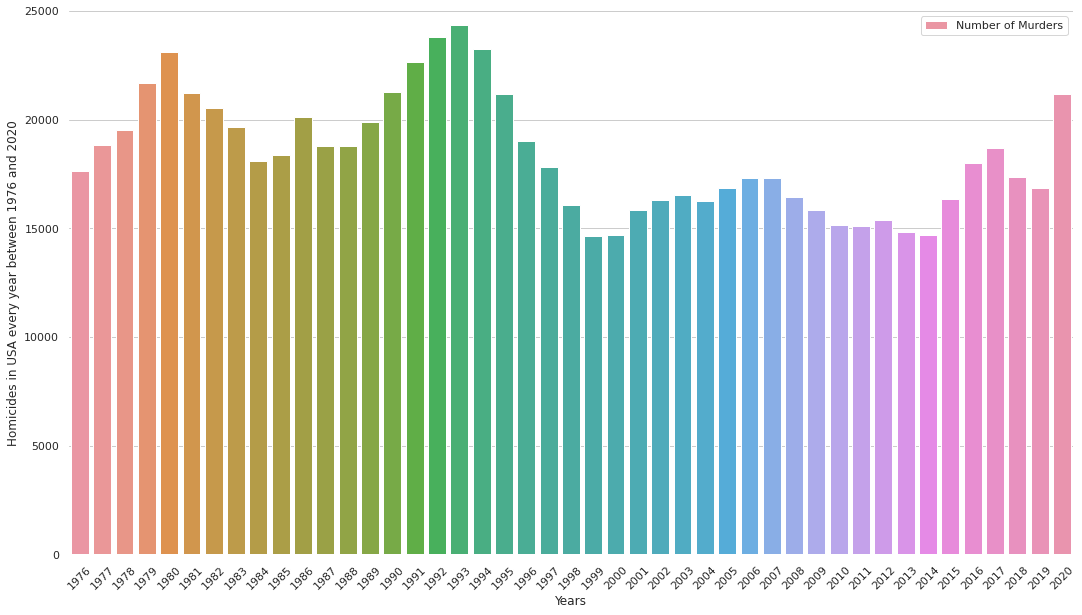

In [ ]:
#read database
# years = pd.DataFrame(data, columns = ['Year']) 
# count_years = years.stack().value_counts()
# homicides = count_years.sort_index(axis=0, ascending=False)
# #plot the total of homicides
# homicides.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Homicides in EEUU between 1980 and 2014');



homicides = data.groupby('Year').agg(count = ('Incident','count')).reset_index()
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(y='count', x="Year", data=homicides,
            label="Number of Murders") #palette= sns.color_palette('pastel'))#colorblind



# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(0, 25000), xlabel="Years", ylabel="Homicides in USA every year between 1976 and 2020")
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)

#### The Trends in Homicides




The overall trend of murders shows decreased. However we can look at some areas where the crimes risen and look at the reason for this trend. In 1985 the crack cocaine market grew. According to [this report](https://pubs.aeaweb.org/doi/pdf/10.1257/089533004773563485) some of the interesting reasons are:
1.   About 25% of homicides are crack related. Interestingly enough the homicides are involved in crack distribution rather than the psychopharmological effects of crack.
2.   Crime peaked during financial crisis, according to the [UNODC report Monitoring the Impact of Economic Crisis on Crime](https://www.unodc.org/unodc/en/frontpage/2012/February/economic-crises-can-trigger-rise-in-crime.html). 
3. The increased number of police officers was one of the reasons homicide decreased sharply fell in the 1990's. 
    *   The police officers increased by 14 percent (50,000-60,000) in the 1990s.
    *   Crime reduced by 5-6 percent between 1991 and 2001.
    *   1/5th to 1/10th of the overall decline in crime can be explained by the increase in police.
4. The rising prison population
    *   2 million individuals were incarcerated by 2000 which was four times the number locked up in 1972.
    *   Half of the prison population growth tok place in 1990s.
    *   The sharp rise of prisoners was due to drug-related offenses.
        - increase revocation of parole 
        - longer sentences
        - increased punishment
            - the threat of punishment became a large deterent of crime causing the reduction in homicide of about 12 percent.
5. The legalization of abortion. The negative impact of adverse home environments on eventual criminality, has been stated [here](https://www.jstor.org/stable/2657324).
6. Political and Social Unrest during 2020 from this [Source](https://www.pewresearch.org/fact-tank/2021/10/27/what-we-know-about-the-increase-in-u-s-murders-in-2020)
    - The COVID-19 pandemic saw a surge of violence as people struggled to get acess to essential items. 
    - The year 2020 saw a lot of political unrest with the election of the new president. 
    - There was also a lot of violence related to the clashes between the regulatory force and protestors for various social revolutions like the BLM movement.

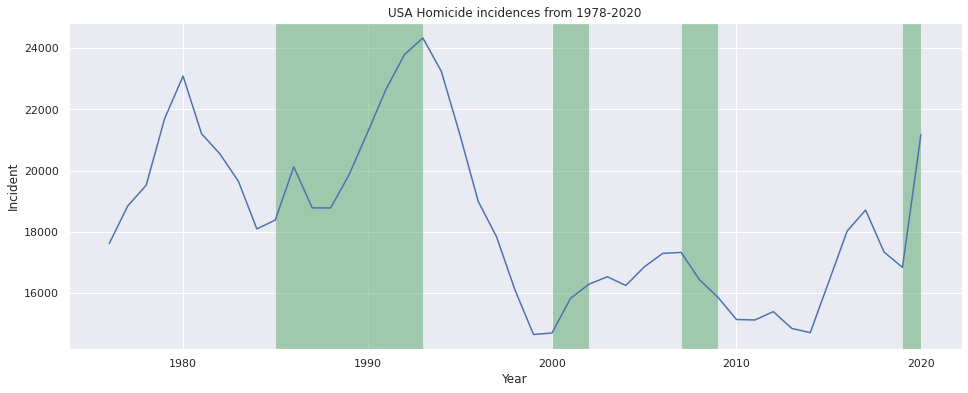

In [ ]:
# Group the count of incident by year 
# Reset index for plotting
country_incidences = data.groupby('Year')['Incident'].agg('count')
country_incidences = country_incidences.reset_index()

# Create a lineplot over for all the years of data
plt.figure(figsize=(16, 6))
sns.lineplot(data=country_incidences, x='Year',y='Incident').set_title("USA Homicide incidences from 1978-2020")

# mark the financial crises on the graph
plt.axvspan(2000,2002,facecolor='g', alpha=0.5)
plt.axvspan(2007,2009,facecolor='g', alpha=0.5)
plt.axvspan(1985,1993,facecolor='g', alpha=0.5)
plt.axvspan(2019,2020,facecolor='g', alpha=0.5)

**Percentage Change of Homicide Incidences** 
Here we calculated the percentage change of incidences from 1980-2014. As per above we see the biggest percentage increase in times of crack epidemic and its decrease in the end. Moreover, the increase of incidences at the start of the dot com financial crisis (end of 1990's). 

**Code:** 
We select two columns that we need to calculate the percentage change (year, incident). Then pct_change() method is used to calculate the percentage change and multiplied with a 100 to turn it into percentage format. The plot is then performed in the same manner per above.

Text(0.5, 1.0, 'Percentage Change of USA Homicides during 1980-2014')

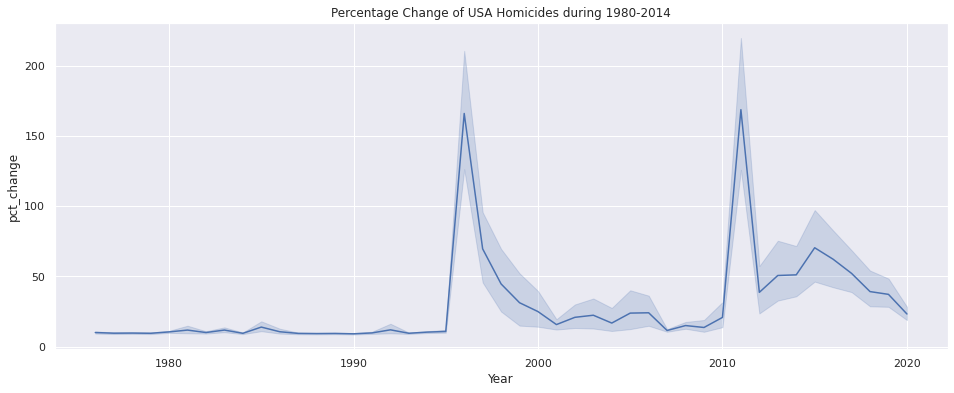

In [ ]:
# subset the data we need for the plot (year and incident)
pct_change = data[['Year','Incident']]

# Create a new column and apply the formula that calculates the pct change and multiply it to create a percentage
pct_change["pct_change"] = pct_change["Incident"].pct_change()*100

# plot and add the tittle 
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='pct_change',data=pct_change).set_title("Percentage Change of USA Homicides during 1980-2014")

In [ ]:
year_min = data['Year'].value_counts().index[34]
total_year_min = data['Year'].value_counts().min()
print('The least murderous year was', year_min, 'with a total of', total_year_min, 'murders')
year_max = data['Year'].value_counts().index[0]
total_year_max = data['Year'].value_counts().max()
print('The most murderous year was', year_max,' with a total of', total_year_max , 'murders')

The least murderous year was 2004 with a total of 14644 murders
The most murderous year was 1993  with a total of 24337 murders


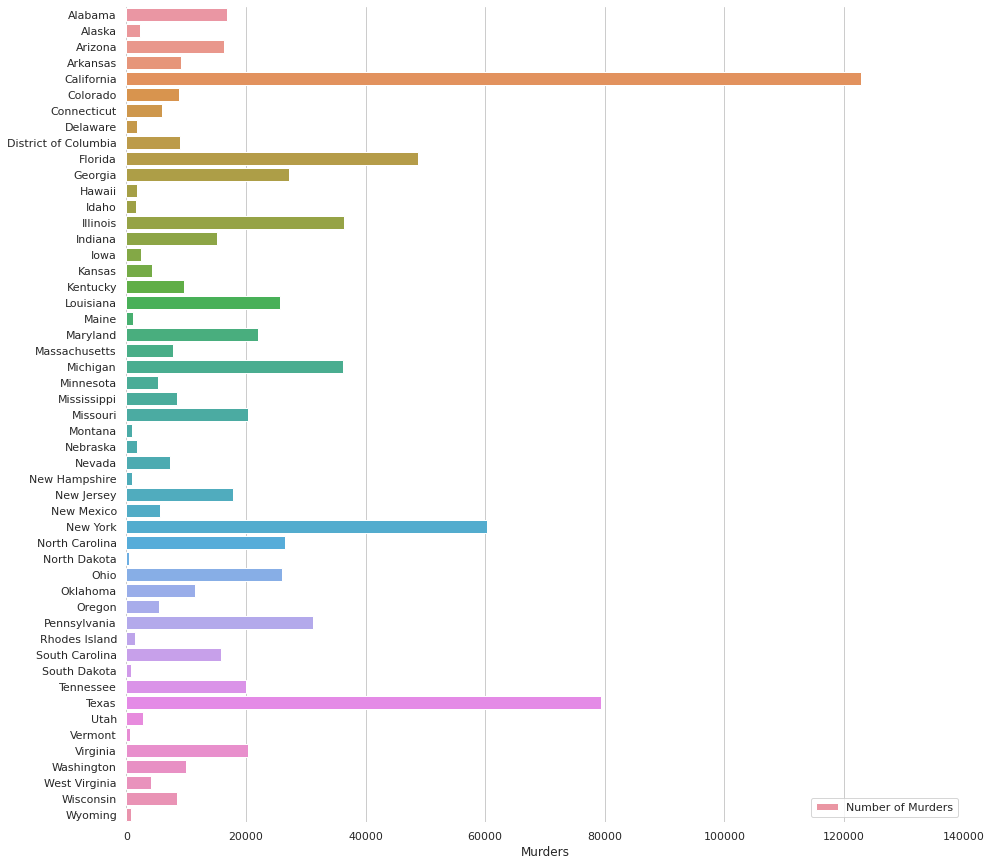

In [ ]:
# state = data['State']
# count_states = state.value_counts()
# states = count_states.sort_index(axis=0, ascending=False)
# print(states.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(10, 10), title='Murders by state between 1980 and 2014'))

state = data.groupby('State').agg(count = ('Incident','count')).reset_index()
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x='count', y="State", data=state,
            label="Number of Murders")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 140000), ylabel="", xlabel="Murders")
sns.despine(left=True, bottom=True)


In [ ]:
state_max = data['State'].value_counts().index[0]
total_state_max = data['State'].value_counts().max()
state_min = data['State'].value_counts().index[50]
total_state_min = data['State'].value_counts().min()

print('The state with the highest number of murders was', state_max,'with a total of', total_state_max, 'murders')
print('The state with the lowest number of murders was', state_min,'with a total of', total_state_min, 'murders')
print('The top 3 most dangerous states in terms of murders are:\n', data['State'].value_counts().nlargest(3))

The state with the highest number of murders was California with a total of 122841 murders
The state with the lowest number of murders was North Dakota with a total of 494 murders
The top 3 most dangerous states in terms of murders are:
 California    122841
Texas          79366
New York       60336
Name: State, dtype: int64


The figure above is an example of framing bias in visualization. This plot is visually biased because it makes a viewer believe that states like California and Texas have a very high crime rate while it might be that the number of crimes is due to the large population. We will divide the crimes by population and plot that instead.

Population [data](https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/state/totals/) by US census.
We get a new column avg_pop over the last 10 years and drop all columns except the state name and the avg population.


In [ ]:
df =  pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/state/totals/nst-est2020-alldata.csv")
df.head(10)
#[['NAME','STATE','CENSUS2010POP']]

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,NPOPCHG_2020,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,BIRTHS2019,BIRTHS2020,...,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RNATURALINC2019,RNATURALINC2020,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RINTERNATIONALMIG2019,RINTERNATIONALMIG2020,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RDOMESTICMIG2019,RDOMESTICMIG2020,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
0,10,0,0,0,United States,308745538,308758105,309327143,311583481,313877662,316059947,318386329,320738994,323071755,325122128,326838199,328329953,329484123,569038,2256338,2294181,2182285,2326382,2352665,2332761,2050373,1716071,1491754,1154170,987836,3973485,3936976,3940576,3963195,3992376,3970959,3890144,3835477,3770397,3748000,...,4.706130,4.590037,4.230759,4.352605,4.044747,3.938250,3.400159,3.056014,2.817948,2.058761,2.561705,2.745929,2.697816,2.980977,3.317393,3.308478,2.926260,2.208328,1.735857,1.450346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.561705,2.745929,2.697816,2.980977,3.317393,3.308478,2.926260,2.208328,1.735857,1.450346
1,20,1,0,0,Northeast Region,55317240,55318414,55380764,55608318,55782661,55912775,56021339,56052790,56063777,56083383,56084543,56002934,55849869,62350,227554,174343,130114,108564,31451,10987,19606,1160,-81609,-153065,163442,646239,637873,635759,632459,634489,628369,617613,614504,602339,596481,...,3.160960,3.177080,2.789443,2.897490,2.592409,2.637773,2.136086,2.039549,1.705079,0.932332,3.747612,3.745635,3.490886,3.987185,4.063061,4.232202,3.882720,3.269277,2.277007,1.960881,-2.796257,-3.722725,-3.897187,-4.891860,-6.075051,-6.668399,-5.656265,-5.277641,-5.437717,-5.635371,0.951355,0.022910,-0.406301,-0.904675,-2.011990,-2.436197,-1.773545,-2.008364,-3.160710,-3.674490
2,20,2,0,0,Midwest Region,66927001,66929737,66975328,67164092,67348275,67576524,67765576,67885682,68018175,68160342,68263019,68340091,68316744,45591,188764,184183,228249,189052,120106,132493,142167,102677,77072,-23347,212599,834852,830699,830845,836493,838071,832757,816921,807621,791161,784823,...,3.700538,3.657760,3.345360,3.540953,3.125529,3.142663,2.593214,2.317301,2.329347,1.657188,1.790749,1.839742,1.917364,2.020613,2.138263,2.171756,1.900285,1.461011,1.240221,1.027889,-2.674590,-2.735258,-1.854974,-2.718179,-3.458766,-3.347881,-2.387543,-2.261577,-2.445889,-3.039511,-0.883842,-0.895516,0.062390,-0.697566,-1.320504,-1.176126,-0.487257,-0.800567,-1.205668,-2.011623
3,20,3,0,0,South Region,114555744,114563042,114869421,116019483,117264196,118397213,119666248,121049223,122419547,123611036,124649156,125686544,126662754,306379,1150062,1244713,1133017,1269035,1382975,1370324,1191489,1038120,1037388,976210,368739,1509643,1505006,1504774,1525284,1545672,1548340,1511014,1502640,1479176,1473609,...,4.734528,4.665813,4.188611,4.361282,4.099462,4.026808,3.401512,3.064768,2.813302,2.007535,2.513243,2.984521,2.827930,3.096426,3.587214,3.596798,3.285860,2.480333,2.108233,1.752991,2.704885,2.949919,2.545516,3.139785,3.768698,3.623898,2.986734,2.811421,3.371409,3.990516,5.218129,5.934440,5.373447,6.236211,7.355913,7.220696,6.272594,5.291755,5.479642,5.743507
4,20,4,0,0,West Region,71945553,71946912,72101630,72791588,73482530,74173435,7493

In [ ]:
df['avg_pop'] = df[['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012', 'POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016',
                    'POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019','POPESTIMATE2020']].mean(axis=1).astype(int)

In [ ]:
df = df[['avg_pop','NAME']]

In [ ]:
df

,avg_pop,NAME
0,320256337,United States
1,55894832,Northeast Region
2,67801258,Midwest Region
3,120935892,South Region
4,75624353,West Region
5,4854350,Alabama
6,733201,Alaska
7,6864345,Arizona
8,2980381,Arkansas
9,38670482,California


In [ ]:
incidences = data.groupby('State')['Incident'].agg('count')
incidences.head(10)

State
Alabama                  16796
Alaska                    2233
Arizona                  16364
Arkansas                  9200
California              122841
Colorado                  8846
Connecticut               6025
Delaware                  1685
District of Columbia      8892
Florida                  48740
Name: Incident, dtype: int64

In [ ]:
avg_df = df.merge(incidences, left_on = "NAME", right_on = "State", how = 'inner')


In [ ]:
avg_df['avg'] = avg_df['Incident']/avg_df['avg_pop']*1000
#avg_df = avg_df.set_index('NAME')
avg_df = avg_df[['avg',"NAME"]]
avg_df

,avg,NAME
0,3.459989,Alabama
1,3.045550,Alaska
2,2.383913,Arizona
3,3.086854,Arkansas
4,3.176609,California
5,1.625412,Colorado
6,1.682286,Connecticut
7,1.789023,Delaware
8,13.283617,District of Columbia
9,2.405153,Florida


In [ ]:
#states = avg_df.sort_index(axis=0, ascending=False)
#print(states.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(10, 10), title='Murders by state between 1980 and 2014'))

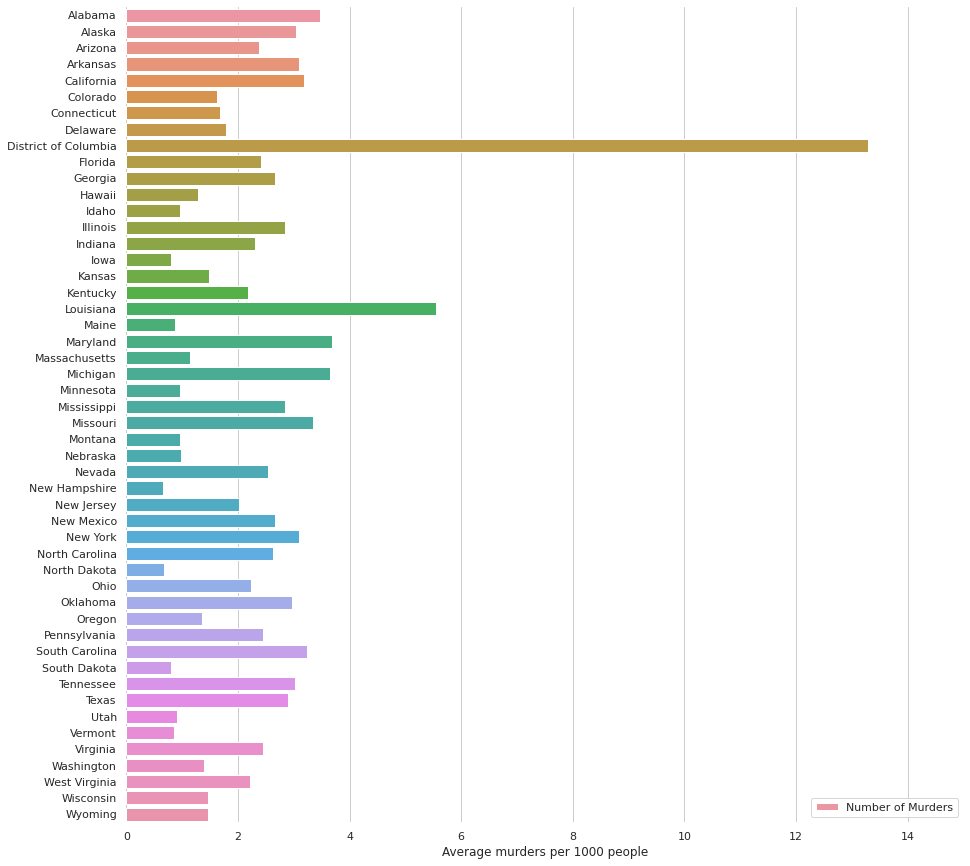

In [ ]:

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x="avg", y="NAME", data=avg_df,
            label="Number of Murders")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 15), ylabel="", xlabel="Average murders per 1000 people")
sns.despine(left=True, bottom=True)

In [ ]:
total_state_max = avg_df['avg'].max()
state_max = avg_df[avg_df['avg'] == total_state_max]['NAME'].values[0]
total_state_min = avg_df['avg'].min()
state_max = avg_df[avg_df['avg'] == total_state_max]['NAME'].values[0]

print(state_max)
print('The state with the highest number of murders was', state_max,'with a total of', total_state_max, 'murders')
print('The state with the lowest number of murders was', state_min,'with a total of', total_state_min, 'murders')
print('The top 3 most dangerous states in terms of murders are:\n', avg_df.nlargest(3,'avg').to_string(index=False))

District of Columbia
The state with the highest number of murders was District of Columbia with a total of 13.283616872523888 murders
The state with the lowest number of murders was North Dakota with a total of 0.6538582112947288 murders
The top 3 most dangerous states in terms of murders are:
        avg                  NAME
 13.283617  District of Columbia
  5.550379             Louisiana
  3.683815              Maryland


Plotting the number of homicides per state for the original unnormalized data. 

Text(0.5, 1.0, 'Geographic homicide distribution')

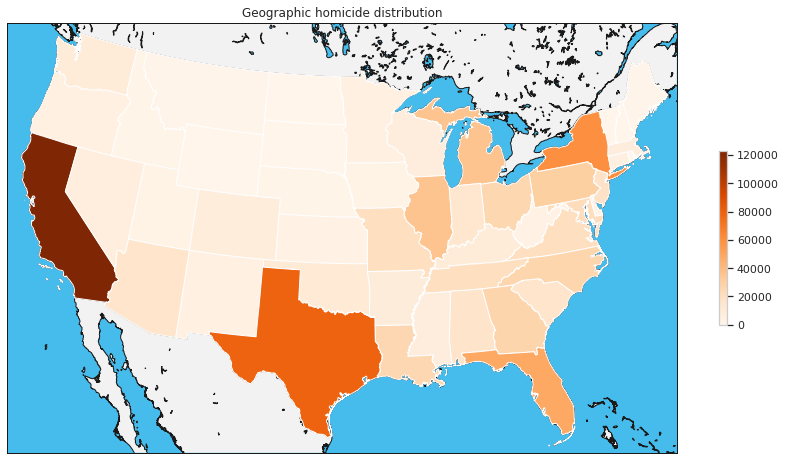

In [ ]:

state = pd.DataFrame(data, columns = ['State']) 
count_states = state.stack().value_counts()
states = count_states.sort_index(axis=0, ascending=False)
states_eeuu = pd.DataFrame({'homicides':states, 'state':states.index})
states_name = states_eeuu.index
#Set the resolution of the plot 
fig, ax = plt.subplots(figsize=(15,8))


#set type of map (projection) and lat&lon parameters
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='lcc',
            lat_1=33,lat_2=45,lon_0=-95,
            llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49)

#Set shapefile to print states
m.readshapefile(root_path+'input/st99_d00', 'states')

#Set colors of map
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()


#Merge info of shapes with homicides stats
geo = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.states],
        'state': [state['NAME'] for state in m.states_info]
    })
geo = geo.merge(states_eeuu, on='state', how='left')

#Colour the map
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(geo.shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(geo['homicides'].fillna(0).values)))
ax.add_collection(pc)

#Add bar
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(geo['homicides'])
plt.colorbar(mapper, shrink=0.4)
plt.title("Geographic homicide distribution")

But taking the normalized data into consideration we get the following graph
## TODO 
Check the range adjustment

Text(0.5, 1.0, 'Geographic homicide distribution')

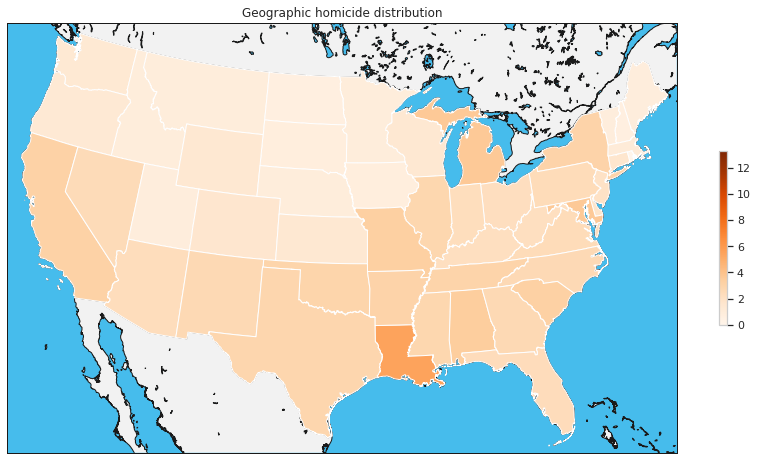

In [ ]:
state = pd.DataFrame(data, columns = ['State']) 

count_states = state.stack().value_counts()
abcd = avg_df.set_index('NAME')['avg']
states = abcd.sort_index(axis=0, ascending=False)
states_eeuu = pd.DataFrame({'homicides':states, 'state':states.index})
states_name = states_eeuu.index
#Set the resolution of the plot 
fig, ax = plt.subplots(figsize=(15,8))


#set type of map (projection) and lat&lon parameters
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='lcc',
            lat_1=33,lat_2=45,lon_0=-95,
            llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49)

#Set shapefile to print states
m.readshapefile(root_path+'input/st99_d00', 'states')

#Set colors of map
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()


#Merge info of shapes with homicides stats
geo = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.states],
        'state': [state['NAME'] for state in m.states_info]
    })
geo = geo.merge(states_eeuu, on='state', how='left')

#Colour the map
cmap = plt.get_cmap('Oranges')   
pc = PatchCollection(geo.shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(geo['homicides'].fillna(0).values)))
ax.add_collection(pc)

#Add bar
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(geo['homicides'])
plt.colorbar(mapper, shrink=0.4)
plt.title("Geographic homicide distribution")

We can visualize the resolution rate by the state.

In [ ]:
# Rate of homicides resolution by state

df = pd.DataFrame(data, columns = ['State','Solved']) 
homicides_state = df['State'].value_counts()

#Get homicides solved by state
mask = (df['Solved'] == 'Yes')
homicides_solved = pd.DataFrame(data.loc[mask], columns = ['State', 'Solved']) 
homicides_solved = homicides_solved['State'].value_counts()

#Get homicides unsolved by state
mask2 = (df['Solved'] == 'No')
homicides_unsolved = pd.DataFrame(data.loc[mask2], columns = ['State', 'Solved'])
homicides_unsolved = homicides_unsolved['State'].value_counts()
homicides = pd.DataFrame({'Solved':homicides_solved, 'Unsolved':homicides_unsolved})
homicides['Resolution Rate'] = (homicides['Solved'] *100 ) / (homicides['Solved'] + homicides['Unsolved'])

#Plot Results
state = pd.DataFrame(data, columns = ['State']) 
resolution_rate = pd.DataFrame({'state':states.index, 'resolution rate':homicides['Resolution Rate']})

#Set the resolution of the plot 
fig, ax = plt.subplots(figsize=(20,10))

#set type of map (projection) and lat&lon parameters
m = Basemap(resolution='h', # c, l, i, h, f or None
            projection='lcc',
            lat_1=33,lat_2=45,lon_0=-95,
            llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49)

#Set shapefile to print states
m.readshapefile(root_path+'input/st99_d00', 'states')

#Set colors of map
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()


#Merge info of shapes with homicides stats
geo = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.states],
        'state': [state['NAME'] for state in m.states_info]
    })
geo = geo.merge(resolution_rate, on='state', how='left')

#Colour the map
cmap = plt.get_cmap('Greens')   
pc = PatchCollection(geo.shapes, zorder=2)
norm = Normalize()
 
pc.set_facecolor(cmap(norm(geo['resolution rate'].fillna(0).values)))
ax.add_collection(pc)

#Add bar
mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(geo['resolution rate'])
plt.colorbar(mapper, shrink=0.4)
plt.title("Resolution rate (in %) of homicides by state")

ValueError: ignored

In [ ]:
def plot_histo(data, col, Y_columns):
    df = data.copy()
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    
    for i in range(0,2):
        cnt = []; y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt += [df[df[y_col] == val][col].values]
        bins = df[col].nunique()

        axs[i].hist(cnt, bins=bins, stacked=True)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Histogram of the "+col+" column by "+y_col)

    plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


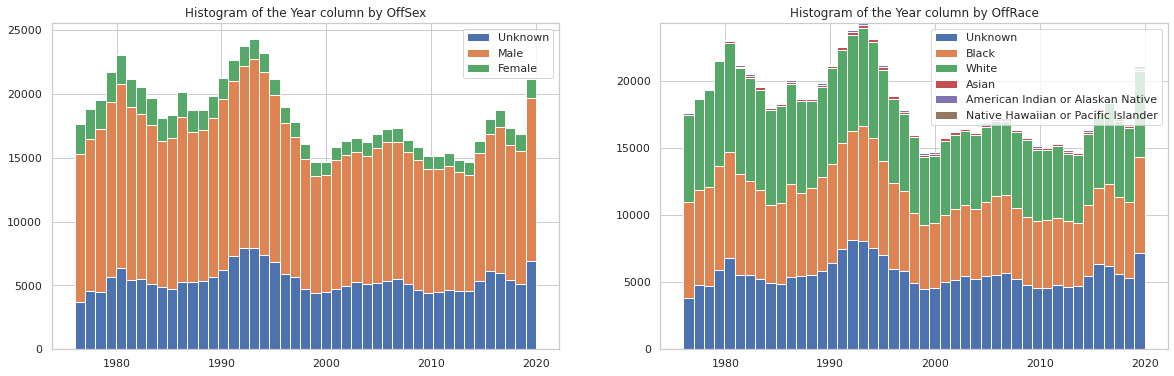

In [ ]:
Y_columns = ['OffSex', 'OffRace', 'OffAge']
ignore_columns = ['Solved']
cat_columns = []
num_columns = []

for col in data.columns.values:
    if col in Y_columns+ignore_columns:
        continue
    elif data[col].dtypes == 'int64':
        num_columns += [col]
    else:
        cat_columns += [col]

plot_histo(data, col='Year',Y_columns=Y_columns)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


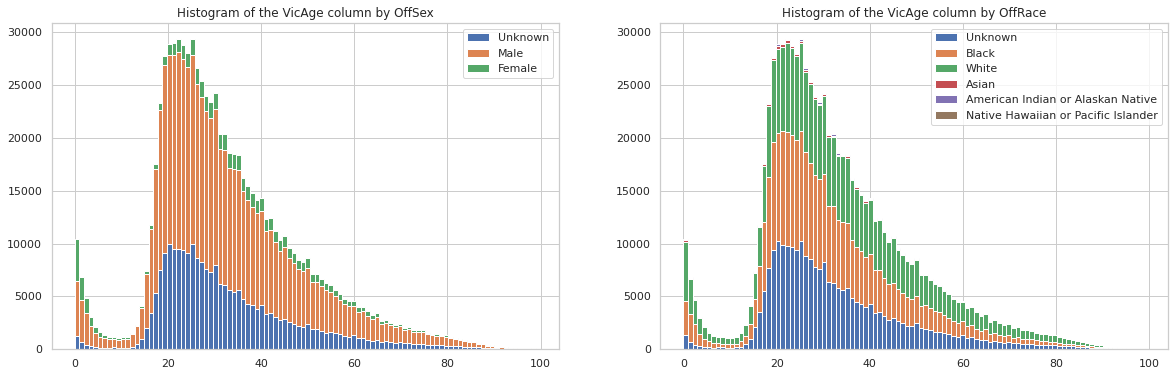

In [ ]:
plot_histo(data, col='VicAge',Y_columns=Y_columns)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


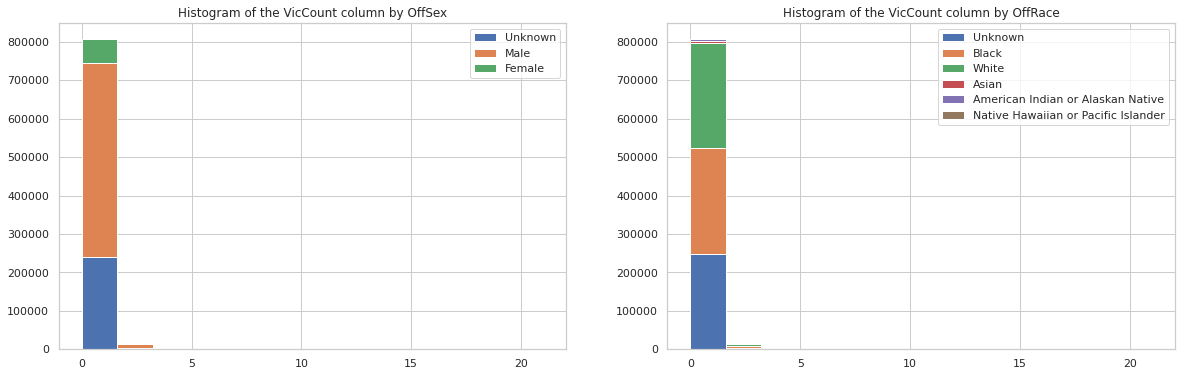

In [ ]:
plot_histo(data, col='VicCount',Y_columns=Y_columns)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


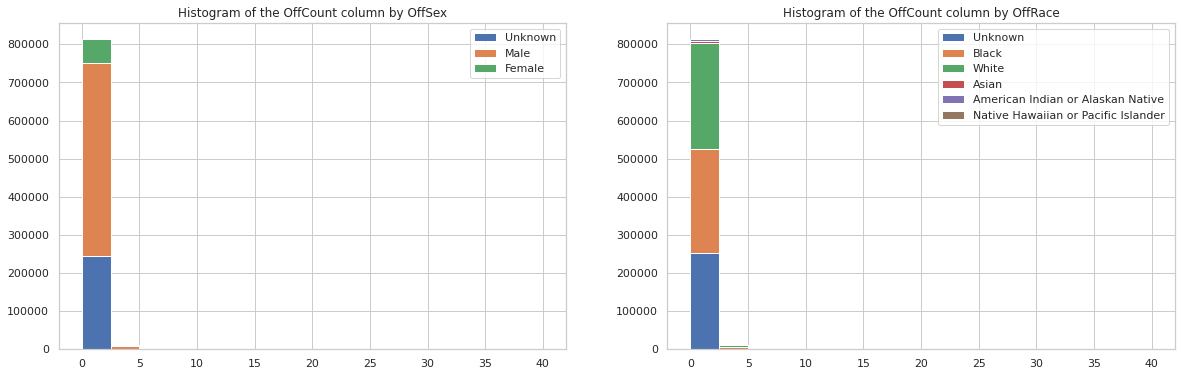

In [ ]:
plot_histo(data, col='OffCount',Y_columns=Y_columns)

In [ ]:
cat_columns


['State',
 'Source',
 'StateName',
 'Month',
 'ActionType',
 'Homicide',
 'Situation',
 'VicAge',
 'VicSex',
 'VicRace',
 'VicEthnic',
 'OffEthnic',
 'Weapon',
 'Relationship']

In [ ]:
def plot_bar(data, col, Y_columns, max_cat=10):
    df = data.copy()
    
    fig, axs = plt.subplots(1,2,figsize=(20,6))
    cat_val = df[col].value_counts()[0:max_cat].index.values
    df = df[df[col].isin(cat_val)]

    for i in range(0,2):
        y_col = Y_columns[i]
        Y_values = df[y_col].dropna().drop_duplicates().values
        for val in Y_values:
            cnt = df[df[y_col] == val][col].value_counts().sort_index()
            axs[i].barh(cnt.index.values, cnt.values)
        axs[i].legend(Y_values,loc='upper right')
        axs[i].set_title("Bar plot of the "+col+" column by "+y_col)

    plt.show()

#TODO
figureout what is wrong with this graph

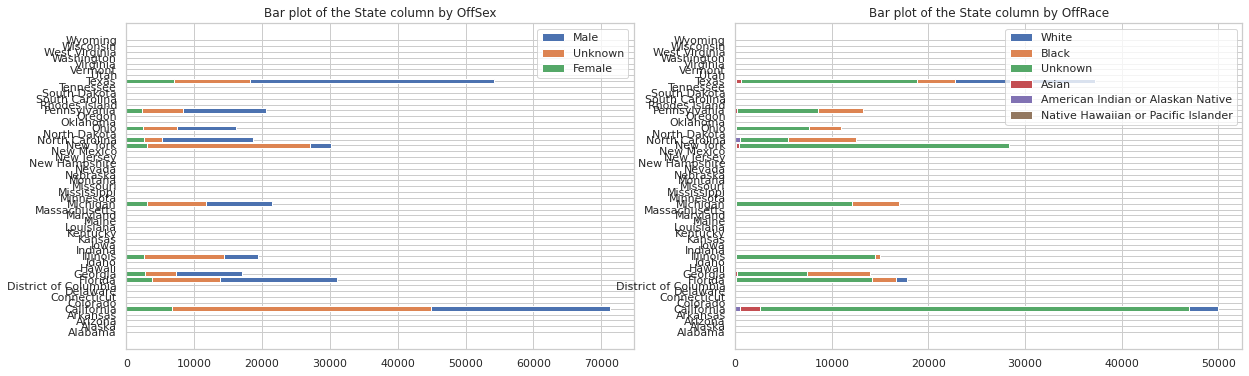

In [ ]:
plot_bar(data, col='State',Y_columns=Y_columns, max_cat=51)

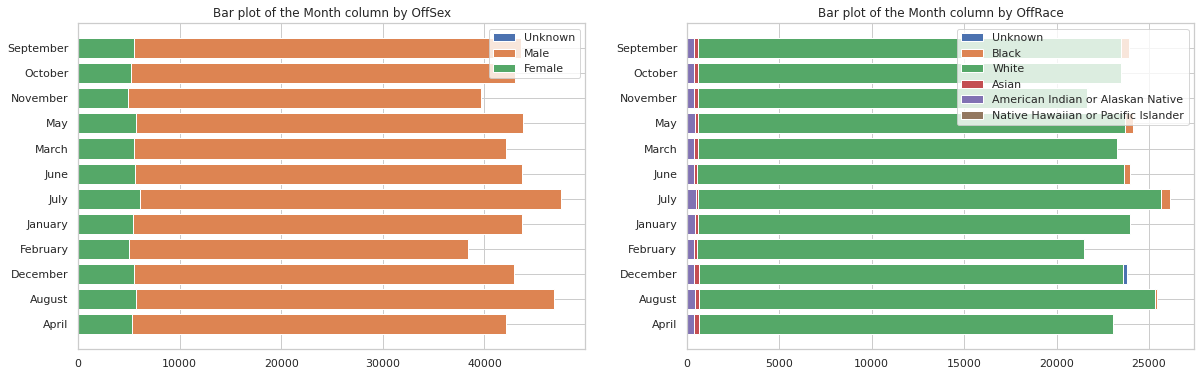

In [ ]:
plot_bar(data, col='Month',Y_columns=Y_columns, max_cat=12)

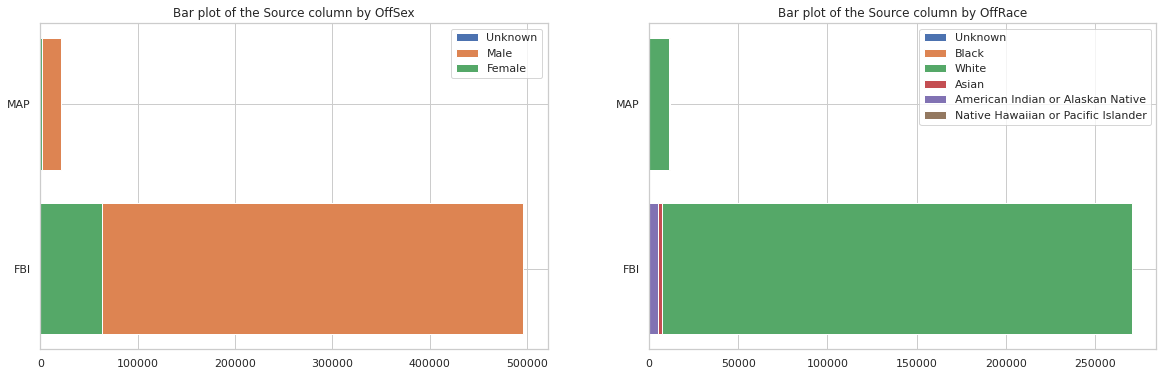

In [ ]:
plot_bar(data, col='Source',Y_columns=Y_columns)

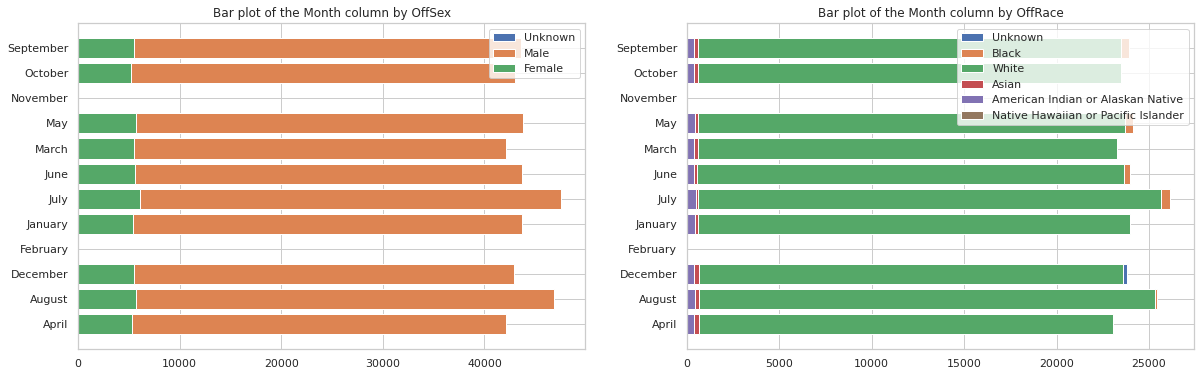

In [ ]:
plot_bar(data, col='Month',Y_columns=Y_columns)

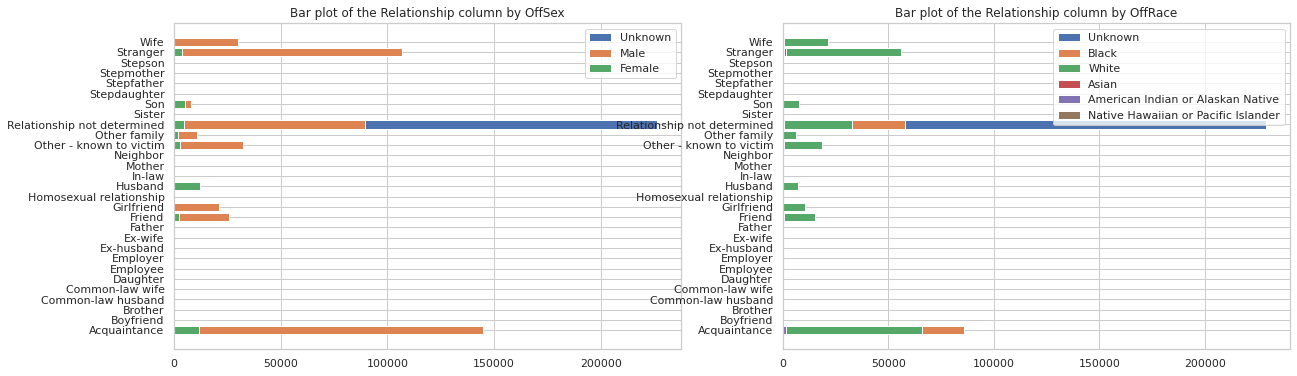

In [ ]:

plot_bar(data, col='Relationship',Y_columns=Y_columns)

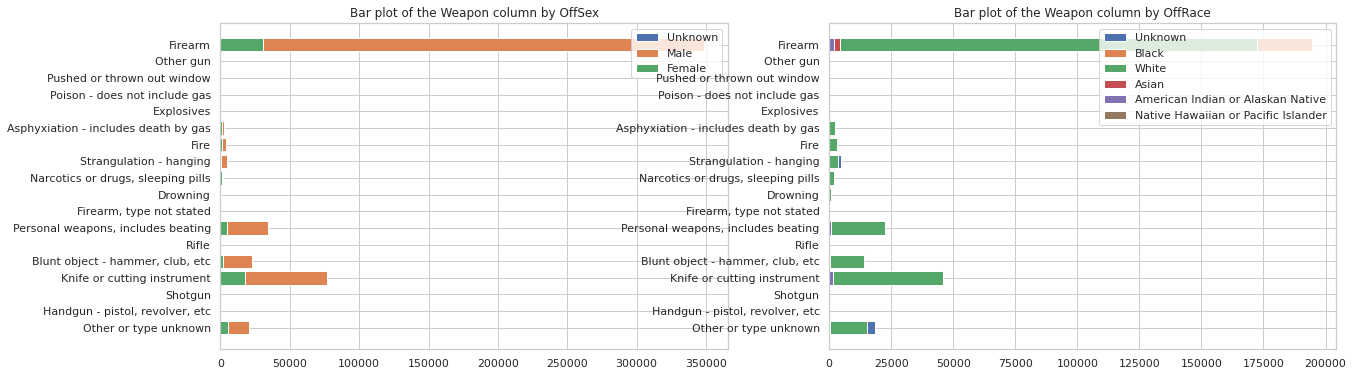

In [ ]:

plot_bar(data, col='Weapon',Y_columns=Y_columns)

#TODO
Household income by state

In [ ]:
https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html
https://data.world/garyhoov/household-income-by-state